#Progress Report 11/12/2015

Papers
---
[Fukai, 1997] http://nct.brain.riken.jp/publications/199701_FukaiTanaka_NeuralComputation.pdf

[She, 2014] http://www.wu.ece.ufl.edu/mypapers/sigmoid_IEEE_doublecolumn.pdf

[*Rotter, 2011*] http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3245521/pdf/fncom-05-00059.pdf

[*Rotter, 2015*] http://www.plosone.org/article/fetchObject.action?uri=info:doi/10.1371/journal.pone.0138947&representation=PDF

---

[Fukai, 1997] investigates under what conditions neural ensembles modeled using Lotka-Volterra type equations exibit swithcing behavior between winner-takes-all and winner-shares-all behavior. 

<img src="fukai_figure2.png">

Lotka-Voletrra
---
To understand this paper I reviewed Lotka-Volterra, also called predator-prey trype equations. The typical equation for the interaction of two species is written as:

$$\frac{dx}{dt} = \alpha x - \beta x y$$ 
$$\frac{dy}{dt} = \delta x y  - \gamma y$$

See example implementation below:

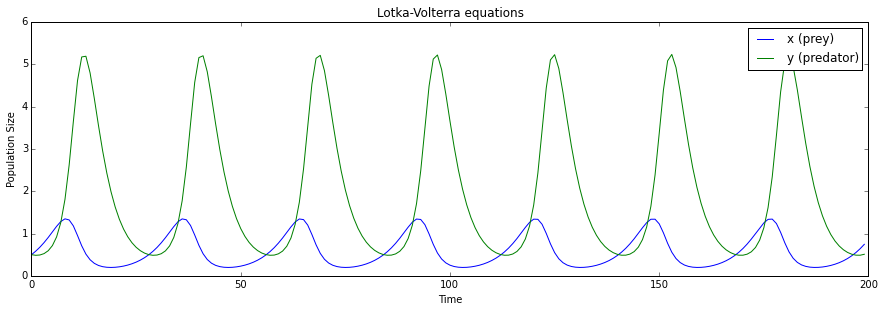

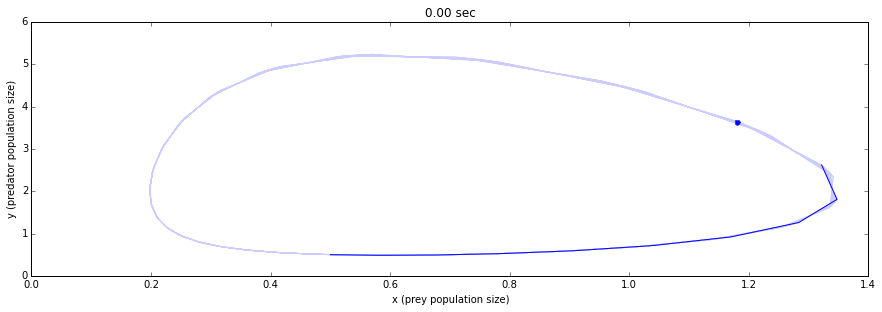

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


<function matplotlib.pyplot.show>

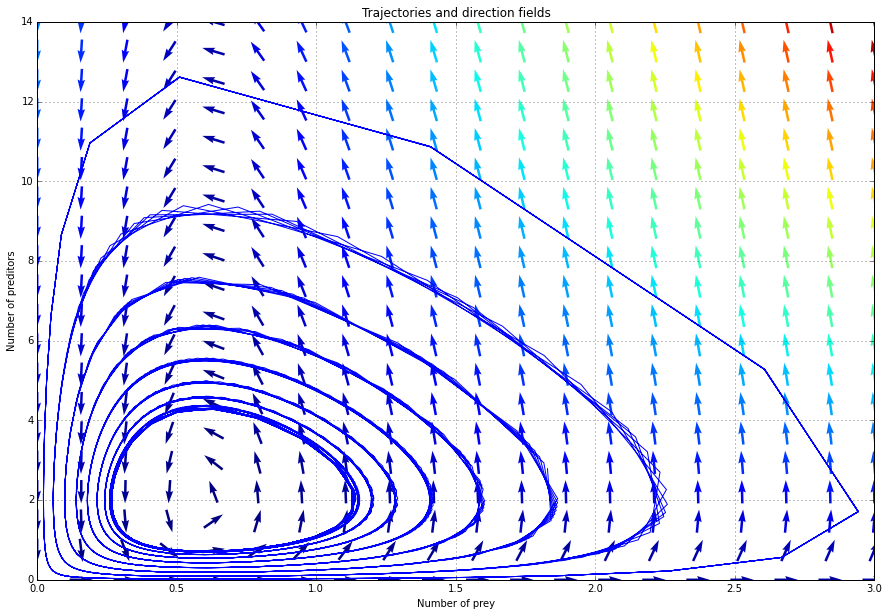

In [91]:
from scipy.integrate import odeint
import pylab as pl
%matplotlib inline

# prey
alpha = 0.2	# growth rate
beta =  0.1 # death rate uppon predation

# predator
gamma = 0.3 # death rate
delta = 0.5 # growth rate upon eating prey

def LotkaVolterra(state,t):
	x = state[0]
	y = state[1]

	xd = alpha*x - beta*x*y
	yd = delta*x*y - gamma*y

	return [xd,yd]


t = range(0,200,1)
state0 = [0.5,0.5]
state = odeint(LotkaVolterra,state0,t)

# Plot
pl.figure(figsize=(15, 10))
pl.subplot(211)
pl.plot(t,state)
pl.xlabel('Time')
pl.ylabel('Population Size')
pl.legend(('x (prey)','y (predator)'))
pl.title('Lotka-Volterra equations')

# animation in state-space
pl.figure(figsize=(15, 10))
pl.subplot(211)
pl.plot(state[:,0],state[:,1],'b-',alpha=0.2)
pl.xlabel('x (prey population size)')
pl.ylabel('y (predator population size)')

# mark the beginning trajectory on the chart
pl.plot(state[0:10,0],state[0:10,1],'b-')
pl.plot(state[10,0],state[10,1],'b.',markersize=10)
pl.title("%4.2f sec" % 0.00)

pl.show()


# PLOT with arrows and different starting points
# taken from matolotlib examples
values  = np.linspace(0.1, 0.9, 10)                          # position of X0 between X_f0 and X_f1
vcolors = pl.cm.autumn_r(np.linspace(0.3, 1., len(values)))  # colors for each trajectory

f2 = pl.figure(figsize=(15, 10))

#-------------------------------------------------------
# plot trajectories

for v, col in zip(values, vcolors):
    #print(v)
    state0 = np.array([1,1])
    X0 = v * state0
    #print(X0) # starting point
    state = odeint(LotkaVolterra, X0, t)       
    pl.plot(state[:,0],state[:,1],'b-',)

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = pl.ylim(ymin=0)[1]                        # get axis limits
xmax = pl.xlim(xmin=0)[1]
nb_points   = 20

x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)                       # create a grid
DX1, DY1 = LotkaVolterra([X1, Y1], t)                      # compute growth rate on the gridt
M = (np.hypot(DX1, DY1))                           # Norm of the growth rate
M[ M == 0] = 1.                                 # Avoid zero division errors
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
pl.title('Trajectories and direction fields')
Q = pl.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=pl.cm.jet)
pl.xlabel('Number of prey')
pl.ylabel('Number of preditors')
pl.legend()
pl.grid()
pl.xlim(0, xmax)
pl.ylim(0, ymax)

pl.show


Competitive Lotka-Volterra
---
The actual equation used in the paper is a so called competitive Lotker-Volterra type equation an looks somewhat different. For N species type interaction:

$$\frac{dx_i}{dt} = r_i x_i (1- \frac{\sum_{j=1}^N \alpha_{ij}x_j}{K_i})$$, where r = growth rate, K = carrying capacity and $\alpha$ = interaction matrix. 

The carrying capacity can be drawn into the interaction matrix resulting in the following equation:

$$\frac{dx_i}{dt} = r_i x_i ( 1 - \sum_{j=1}^N \alpha_{ij}x_j)$$

Compare this to equation [Fukai, 1997] (2.6): 

$$\frac{dz_i}{dt} = z_i ( 1 + W_{i} - \sum_{i'} V_{ii'}z_{i'}) + \epsilon $$

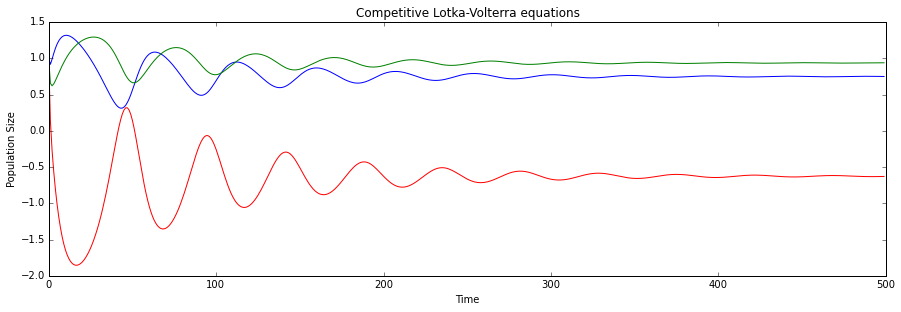

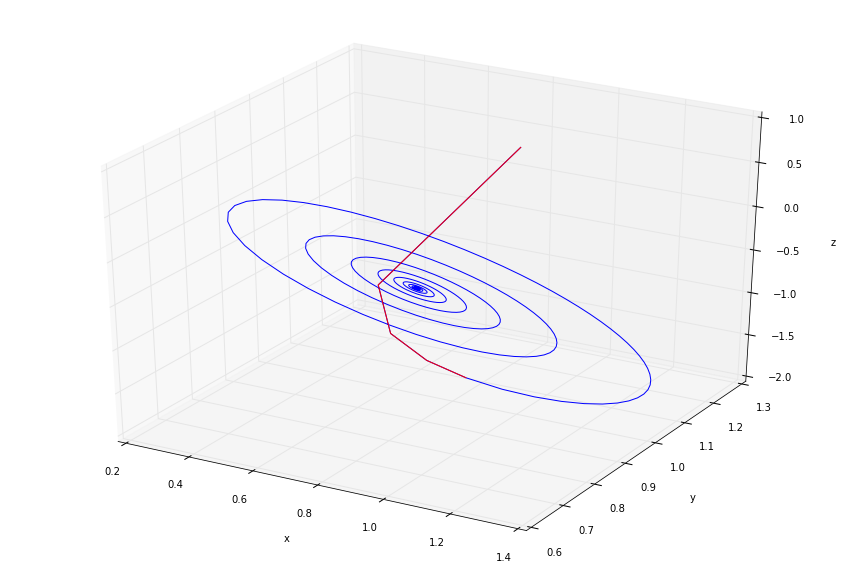

In [79]:
from scipy.integrate import odeint
import pylab as pl
import numpy as np
%matplotlib inline

def CLotkaVolterra(state,t):
	x = state

	# growth rate
	r = np.array([0.4, 0.2, 0.3])

	# influence matrix
	alpha = np.array(((0.25, 1, 0.2), 
					  (0.5, 1, 0.5), 
					  (2, 0, 0.8),) )
	
	xd = np.dot(r,x)*(1 - np.dot(alpha,x))


	return xd

t = range(0,500,1)
state0 = np.array([1, 1, 1])
state = odeint(CLotkaVolterra,state0,t)

#Plot 
pl.figure(figsize=(15, 10))
pl.subplot(211)
pl.plot(t,state)
pl.xlabel('Time')
pl.ylabel('Population Size')
pl.title('Competitive Lotka-Volterra equations')
#pl.show()

#pl.subplot(211)
from mpl_toolkits.mplot3d import Axes3D
fig = pl.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
ax.plot(state[:,0],state[:,1],state[:,2])
ax.plot(state[0:5,0],state[0:5,1], state[0:5,2],'r-')
#ax.plot(state[10,0],state[10,1],'r.',markersize=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
pl.show()

Paper
---
[Perlmutter, 1989] http://www-bcl.cs.may.ie/~barak/papers/NC-dynets-89.pdf investigated the state space behavior of a recurrent neural network implemining XOR functionlity. Even in such a binary task the network "made use of dynamical behavior". They futhermore implemented networks to show dynamic behavior for example circles or figure eight in state space.  

#Connection to functional prior investigation

[She, 2014] investigated recurrent neural network stability conditions in the Lyapunov's sense. 

My idea is that there might be a connection here to a general view on functional priors. The ones be suggested are Information Maximisation and Information Preservation. These are could be connected to entropy and stability of a system so maybe approaching with the tool set used to study stability in dynamical systems like in physics might lead to a unifying view here. 